## Imports

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('wisconsin_breast_cancer.csv')

In [6]:
df.head()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [8]:
df.shape

(699, 11)

## Check for Missing values

In [12]:
df.isna().sum()

id            0
thickness     0
size          0
shape         0
adhesion      0
single        0
nuclei       16
chromatin     0
nucleoli      0
mitosis       0
class         0
dtype: int64

### Replace missing values

In [20]:
mean = round(df['nuclei'].mean(),1)
mean

3.5

In [22]:
df['nuclei'].replace(np.nan, mean, inplace=True)

/var/folders/0_/fw5x31px6q57k5q432gvrz700000gn/T/ipykernel_7965/2545447753.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nuclei'].replace(np.nan, mean, inplace=True)


In [24]:
df.isna().sum()

id           0
thickness    0
size         0
shape        0
adhesion     0
single       0
nuclei       0
chromatin    0
nucleoli     0
mitosis      0
class        0
dtype: int64

## Check Datatypes

In [27]:
df.dtypes

id             int64
thickness      int64
size           int64
shape          int64
adhesion       int64
single         int64
nuclei       float64
chromatin      int64
nucleoli       int64
mitosis        int64
class          int64
dtype: object

## Drop the `id` column

In [30]:
df.drop('id',axis=1, inplace=True)

In [32]:
df.head()

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


## Statistical Analysis

In [35]:
df.describe()

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.543634,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601858,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [37]:
df.corr()['class']

thickness    0.716001
size         0.817904
shape        0.818934
adhesion     0.696800
single       0.682785
nuclei       0.816180
chromatin    0.756616
nucleoli     0.712244
mitosis      0.423170
class        1.000000
Name: class, dtype: float64

### Creating Box Plots & Violin Plots

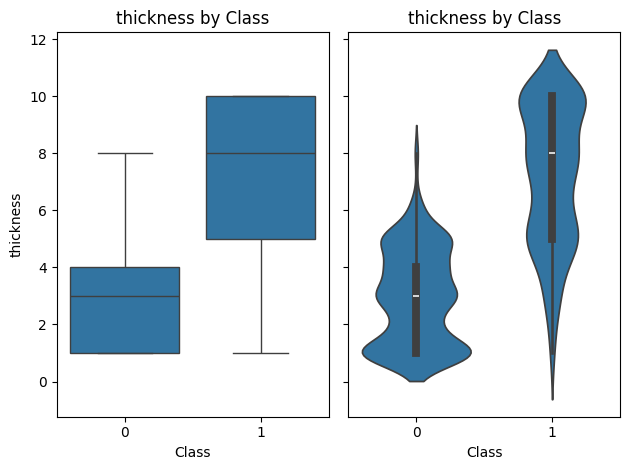

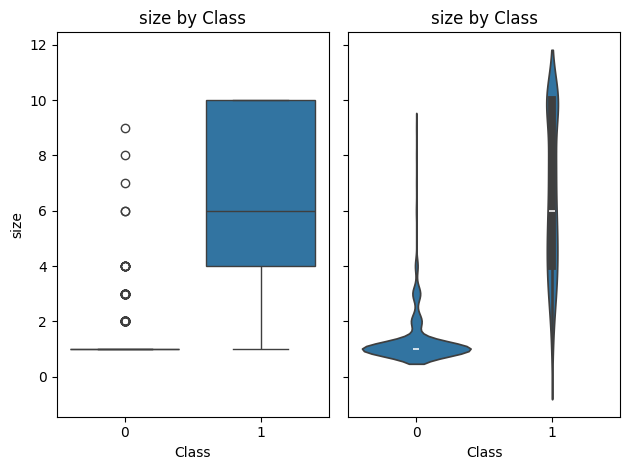

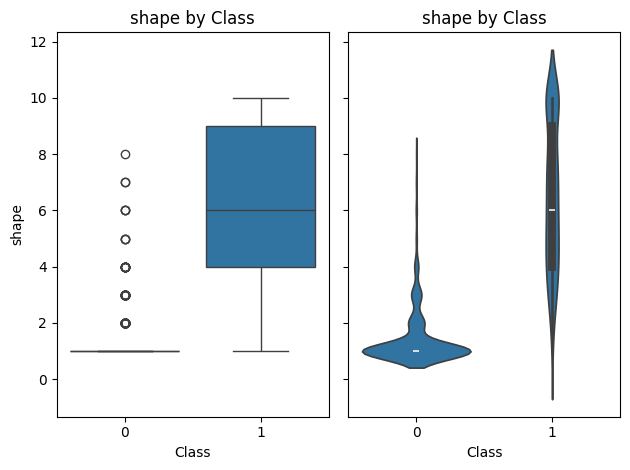

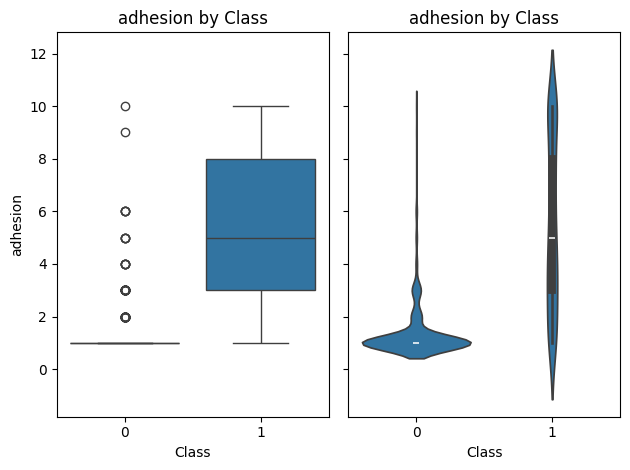

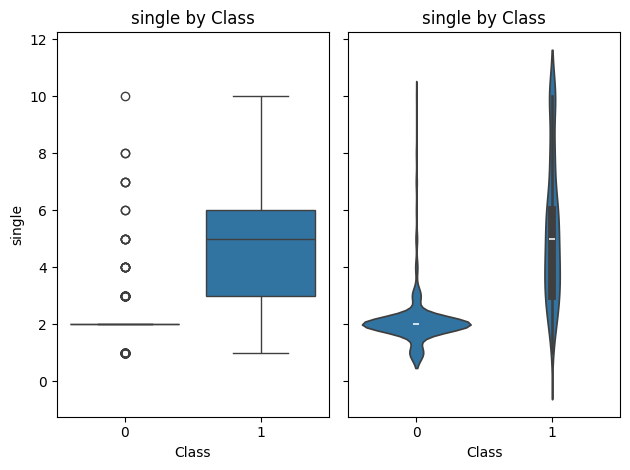

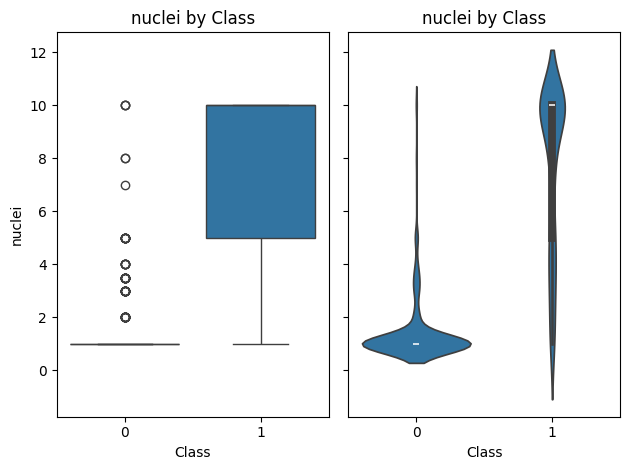

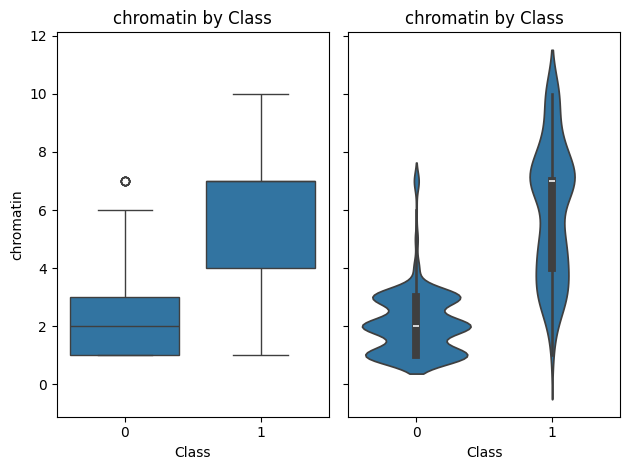

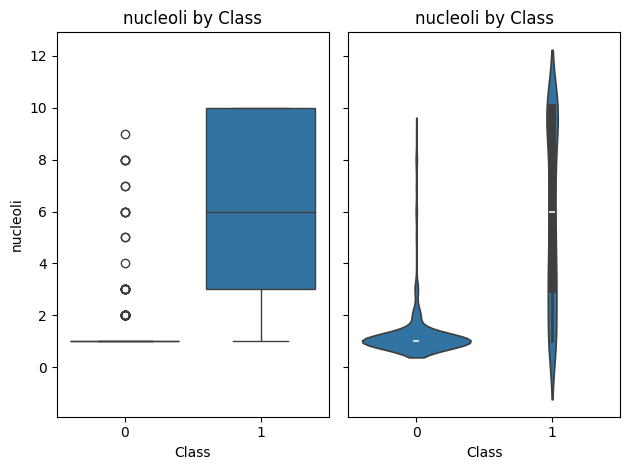

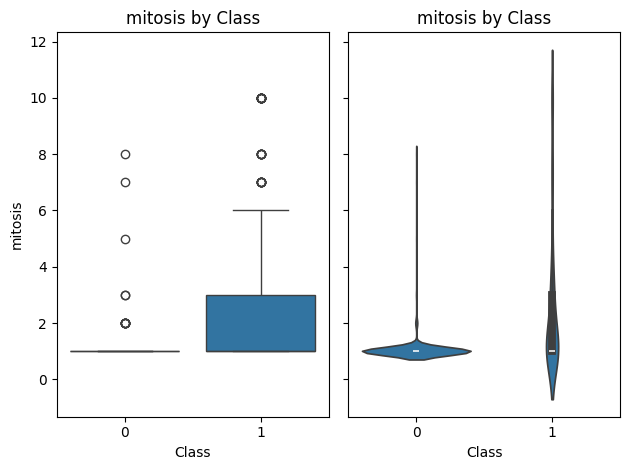

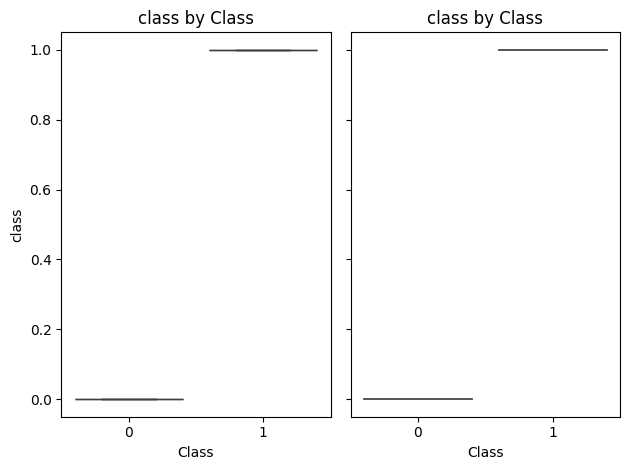

In [59]:
for col in df.columns.tolist():
    fig, ax = plt.subplots(1,2, sharey=True)
    sns.boxplot(x='class',y=col, data=df, ax=ax[0])
    ax[0].set_title(f'{col} by Class')
    ax[0].set_xlabel('Class')
    ax[0].set_ylabel(col)
    
    sns.violinplot(x='class',y=col, data=df, ax=ax[1])
    ax[1].set_title(f'{col} by Class')
    ax[1].set_xlabel('Class')
    ax[1].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

From the plots, mitosis has the least predictive power, so that'll be drop. The remaining features will be used in the ML modeling

In [62]:
df.drop('mitosis', axis=1, inplace=True)

df.head()

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,class
0,5,1,1,1,2,1.0,3,1,0
1,5,4,4,5,7,10.0,3,2,0
2,3,1,1,1,2,2.0,3,1,0
3,6,8,8,1,3,4.0,3,7,0
4,4,1,1,3,2,1.0,3,1,0


In [64]:
df.to_csv('cancer_ml_prediction.csv', index=False)